In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
Rlist = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5]
Vlist = [265, 220, 210, 200, 195, 190, 200, 210, 217, 220, 225, 228, 230, 228, 225, 220, 217, 215, 210, 207, 210, 213, 218, 226, 230]
result = interpolate.CubicSpline(Rlist, Vlist, bc_type='not-a-knot')

In [3]:
# 데이터로 옮긴 회전속도 그래프가 실제와 얼마나 유사한지 확인하기 위해 plot 해보았다.
def plot():
    Rlist = []
    Vlist = []
    R = 0
    while(R <= 0.5): # 각속도가 일정한 구간 / 그래프를 보고 기울기를 추산하여 직선의 방정식을 구했다.
        V = 200 * R + 150
        Rlist.append(R)
        Vlist.append(V)
        R = R + 0.01
    while(R <= 12.5):
        V = result(R) # 보간한 함수 식을 이용하여 회전 속도 값을 추정하였다.
        Rlist.append(R)
        Vlist.append(V)
        R = R + 0.01
    V = 230
    while(R <= 16.0): # 회전 속도가 일정한 구간 / 회전속도가 230km/s 정도로 거의 일정하였다.
        Rlist.append(R)
        Vlist.append(V)
        R = R + 0.01
    plt.plot(Rlist, Vlist)
    plt.xlim(0,15)
    plt.ylim(150,275)

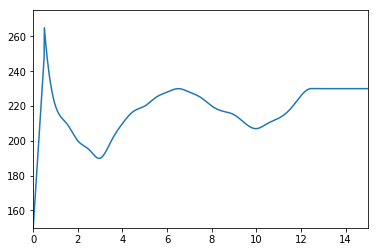

In [4]:
plot() # 교재의 Fig 24.25 와 유사한 개형을 가지는 것을 확인하고 다음 작업을 진행하였다.

In [5]:
# 은하 중심거리 R을 입력하면 그 지점에서의 회전 속도가 출력되는 함수
def V(R):
    if(R <= 0.5): # 강체 회전 구간 / 앞서 구한 직선의 방정식을 이용하였다.
        V = 200 * R + 150
        return V
    elif(R <= 12.5): # 앞서서 보간한 함수의 식을 이용하였다.
        return np.array(result(R))
    elif(R <= 16.0): # 회전 속도가 일정한 구간 / 230km/s 를 출력하도록 하였다.
        return 230

Text(0, 0.5, 'radial velocity(km/s)')

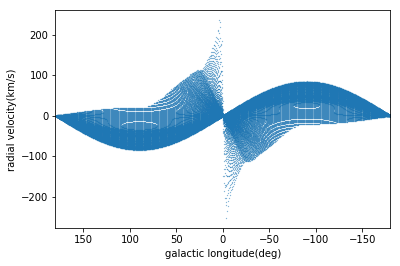

In [16]:
R  = 0.000001 # 분모에 0이 들어가는 것을 방지하기 위해 0에 가까운 작은 수를 선택하였다.
dL = 0.01
dR = 0.1
Llist = []
Vrlist = []

# 특정한 R에 대해 가능한 L값을 모두 대입해주고, R값을 키우는 방식으로 코드를 작성하였다.
# L의 범위가 R의 함수로 나타났기 때문이다. 반대로하면(L에 대해 R을 대입한 후 L을 키우는 방식) 코드가 더욱 복잡해질 것이다.

while(R <= 16): # 은하 중심거리가 16kpc 인 지점까지
    if(R < 8): # 태양보다 안쪽 궤도를 도는 항성들에 대해
        Lmax = np.arcsin(R / 8) # 은경의 제한 범위 구해주기
        L = (-1) * Lmax
        while(L <= Lmax):
            Vr = np.sin(L) * (V(R) * 8 / R - 200) # V(R) 함수의 값을 호출하여 계산해준다
            Llist.append(L)
            Vrlist.append(Vr)
            L = L + dL    
    else: # 태양 바깥쪽 궤도를 도는 항성에 대해
        L = (-1) * np.pi
        while(L <= np.pi):
            Vr = np.sin(L) * (V(R) * 8 / R - 200) # V(R) 함수의 값을 호출하여 계산해준다
            Llist.append(L)
            Vrlist.append(Vr)
            L = L + dL
    R = R + dR
Llist = np.array(Llist)
Llist = Llist * 180 / np.pi # rad 단위를 deg 단위로 바꿔준다.
plt.scatter(Llist, Vrlist, s = 0.05)
plt.xlim(180, -180)
plt.xlabel("galactic longitude(deg)")
plt.ylabel("radial velocity(km/s)")